In [3]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [4]:
os.chdir(r'C:\Users\vigne\Desktop\WORK\DATASETS')

In [5]:
titanic_data = pd.read_csv('titanic.csv')

In [8]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
print("# of passengers in original data:" + str(len(titanic_data.index)))

# of passengers in original data:418


<AxesSubplot:xlabel='Survived', ylabel='count'>

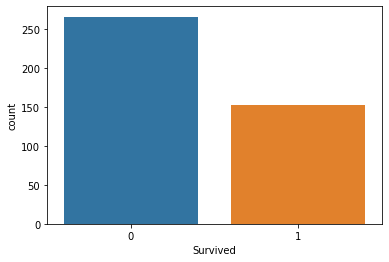

In [10]:
sns.countplot(x="Survived",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

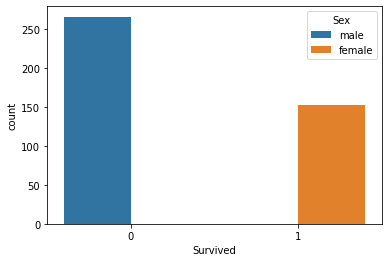

In [13]:
sns.countplot(x="Survived",hue="Sex",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

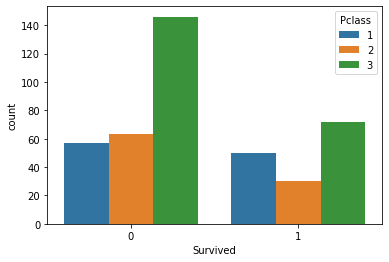

In [14]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

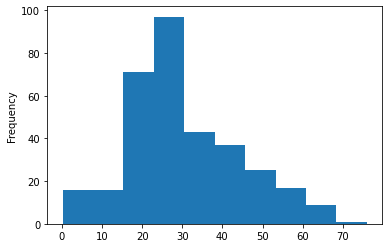

In [15]:
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

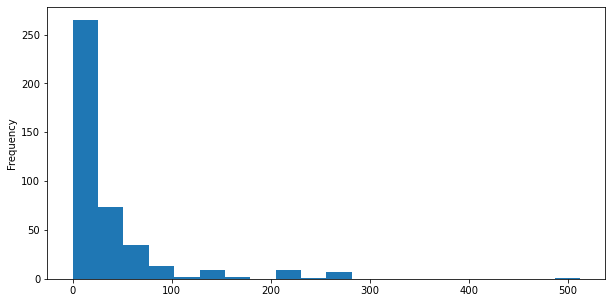

In [18]:
titanic_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [19]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

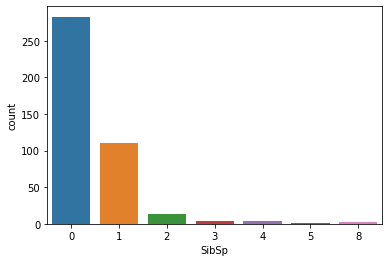

In [21]:
sns.countplot(x="SibSp",data=titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

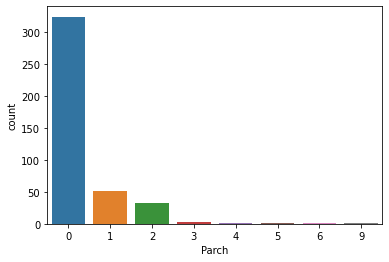

In [22]:
sns.countplot(x="Parch",data=titanic_data)

In [23]:
#cleaning
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [24]:
 titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

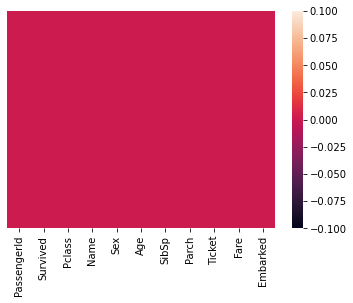

In [35]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

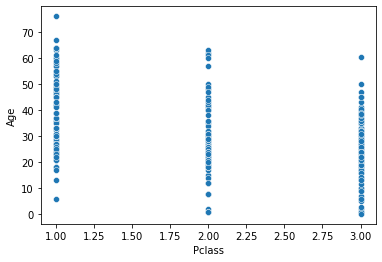

In [28]:
sns.scatterplot(x="Pclass",y="Age",data=titanic_data)

In [29]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [31]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [32]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

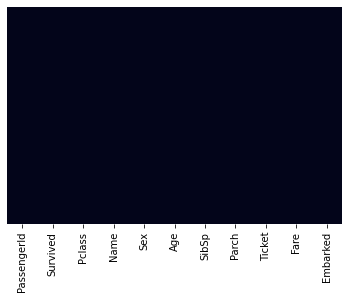

In [33]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [38]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [44]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,1
3,1
4,0


In [51]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [54]:
Pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [55]:
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [56]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [57]:
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [59]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,34.5,0,0,7.8292,1,1,0,0,1
1,1,3,47.0,1,0,7.0000,0,0,1,0,1
2,0,2,62.0,0,0,9.6875,1,1,0,1,0
3,0,3,27.0,0,0,8.6625,1,0,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1,0,1


In [91]:
#titanic_data.drop('Pclass',axis=1,inplace=True)

In [92]:
#splitting
X=titanic_data.drop("Survived",axis=1,)
y=titanic_data["Survived"]

In [93]:
from sklearn.model_selection import train_test_split 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [99]:
 from sklearn.linear_model import LogisticRegression

In [102]:
logmodel=LogisticRegression()

In [103]:
logmodel.fit(X_train,y_train)

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
predictions=logmodel.predict(X_test)

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [107]:
from sklearn.metrics import classification_report

In [108]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        57\n           1       1.00      1.00      1.00        43\n\n    accuracy                           1.00       100\n   macro avg       1.00      1.00      1.00       100\nweighted avg       1.00      1.00      1.00       100\n'

In [109]:
from sklearn.metrics import confusion_matrix

In [111]:
confusion_matrix(y_test,predictions)

array([[57,  0],
       [ 0, 43]], dtype=int64)